#  Computer Vision in Health Care Lab
### Name: V Padmaja
### RegNo: 19BAI1107
## Lab Experiment 11 and 12: Image Classification using Convoutional Neural Networks
### Dataset Used: Brain Tumor Dataset from kaggle
#### Multiclass Classification
The following are the classes present in the dataset
- Glioma
- Meningioma
- Pitutary 
- No tumor


### Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Necessary Libraries

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys

In [3]:
import tensorflow as tf
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers import Flatten
from keras.layers import Dense
import os
import sys

### Defining the classifier network

In [4]:
classifier = Sequential()

### Adding layers to classifier network

In [5]:
classifier.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dropout(0.2))
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=4, activation='softmax'))

### Compiling the network

In [6]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Using imageDataGenerator to preprocess the data

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
evaluate_datagen = ImageDataGenerator(rescale=1./255)

### Defining Training and Testing sets

In [8]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Brain_Tumor/Training', target_size=(32, 32), batch_size=64, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Brain_Tumor/Testing', target_size=(32, 32), batch_size=64, class_mode='categorical')

Found 5717 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Training

In [9]:
score_fit = classifier.fit_generator(train_generator, steps_per_epoch=25,epochs=25, validation_data=test_generator, validation_steps=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
25/25 [==============================] - 826s 34s/step - loss: 1.2371 - accuracy: 0.4062 - val_loss: 1.0342 - val_accuracy: 0.5531
Epoch 2/25
25/25 [==============================] - 547s 22s/step - loss: 0.9887 - accuracy: 0.5713 - val_loss: 0.9014 - val_accuracy: 0.6953
Epoch 3/25
25/25 [==============================] - 319s 13s/step - loss: 0.8381 - accuracy: 0.6500 - val_loss: 0.7922 - val_accuracy: 0.7250
Epoch 4/25
25/25 [==============================] - 235s 10s/step - loss: 0.7580 - accuracy: 0.7069 - val_loss: 0.8533 - val_accuracy: 0.6922
Epoch 5/25
25/25 [==============================] - 154s 6s/step - loss: 0.6887 - accuracy: 0.7367 - val_loss: 0.7938 - val_accuracy: 0.7031
Epoch 6/25
25/25 [==============================] - 123s 5s/step - loss: 0.6725 - accuracy: 0.7369 - val_loss: 0.8653 - val_accuracy: 0.6984
Epoch 7/25
25/25 [==============================] - 85s 3s/step - loss: 0.6650 - accuracy: 0.7412 - val_loss: 0.8573 - val_accuracy: 0.6906
Epoch 8/25

### Obtaining score of classifier

In [10]:
# print("Train generator indices : ", train_generator.class_indices)
score = classifier.evaluate_generator(test_generator, 32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


### Printing Accuracy and loss

In [11]:

print("Evaluation :  ===============================================================")
print("Loss : ", score[0])
print("Accuracy : ", score[1])

Evaluation :  ===============================================================
Loss :  0.5086400508880615
Accuracy :  0.7856597900390625


### Visualizing Training vs Validation (accuracy and loss) plots

In [12]:
import matplotlib.pyplot as plt

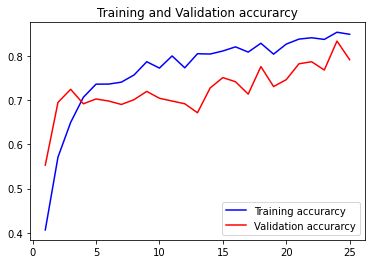

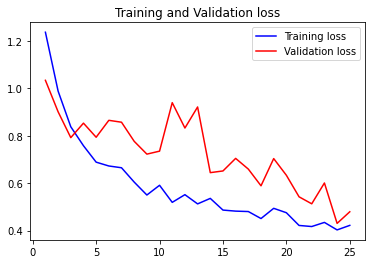

In [13]:
acc = score_fit.history['accuracy']
val_acc = score_fit.history['val_accuracy']
loss = score_fit.history['loss']
val_loss = score_fit.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

### Conclusion

#### We have obtained an accuracy of 78.56% for the Brain Tumor Classification Dataset. From the training  accuracy vs validation accuracy plot we can see that the accuracy improves as the no. of epochs increases. From the loss plot it is evident that the loss decreases as the epochs increase. However the loss curve for validation set is a little nosy indicating that the models finds it a little dificult to fit new data.

#### From the accuracy plot it is quite evident that the gap between the training and validation curve is less indicating that the model is neither overfitted nor underfitted